# Development for morphology trait extraction

This notebook gives examples and a platform to develop and visualize extraction on morphological traits
The functions used are define in a class "Traits_class" that you can find in the same folder (Morphology-analysis/Scripts/Traits_class.py).
If you want modify the "Traits_class.py" reload the module by running the first cell to see the modification appear in the notebook.

**Study case:**
To illustrate the morphology workflow and functionality, we are using the 2 images :

    + Morphology-analysis/Test_Data/INHS_FISH_000742_segmented.png
    + Morphology-analysis/Test_Data/INHS_FISH_18609_segmented.png
    
the Module Traits_class contains 3 classes :

    + Segmented_images : create a object with load png image, isolate each channel and create Presence absence table
    + Measure_morphology : child of Segmented_images. Calculate landmark and morphology measurement using isolated channels.
    + Visualization_morphology : child of Measure_morphology. Vizualize the measures and object created in Measure_morphology.
    

In [1]:
# load what you need
import Traits_class as tc
import json, sys, os
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image
import importlib
import skimage as ski
importlib.reload(tc)

<module 'Traits_class' from '/users/PAS2136/thibaulttabarin/Morphology-analysis/Scripts/Traits_class.py'>

In [2]:
# load the test image, you can add more test image if you have bug related to specific images.
segmented_file = '../Test_Data/INHS_FISH_000742_segmented.png'
#segmented_file = '../Test_Data/INHS_FISH_85194_segmented.png'
metadata_file = '../Test_Data/INHS_FISH_000742.json'

## 1- Segmented_images Class



In [4]:
# Create the object segmented image create by the class during initialisation
img_seg = tc.Segmented_image(segmented_file)

In [7]:
# output the variables create at initialization time
file_name = img_seg.file
base_name = img_seg.base_name
align = img_seg.align # True or False do you want to align the fish pca with horizontal
cutoff = img_seg.cutoff # minimum percent in area that a blob need to be a valide trait
trait_color_dict = img_seg.trait_color_dict # Look up table trait->color is different from the default change this variable
img_arr = img_seg.img_arr # original image
masks = img_seg.mask # dictionnary with the 12 channels representing each a trait
presence_matrix = img_seg.presence_matrix # dictionnary with presence table

In [8]:
# visualize an output
print(base_name)
print(presence_matrix)

INHS_FISH_000742
{'dorsal_fin': {'number': 1, 'percentage': 1.0}, 'adipos_fin': {'number': 0, 'percentage': 0}, 'caudal_fin': {'number': 1, 'percentage': 1.0}, 'anal_fin': {'number': 1, 'percentage': 1.0}, 'pelvic_fin': {'number': 1, 'percentage': 1.0}, 'pectoral_fin': {'number': 1, 'percentage': 1.0}, 'head': {'number': 1, 'percentage': 1.0}, 'eye': {'number': 1, 'percentage': 1.0}, 'caudal_fin_ray': {'number': 0, 'percentage': 0}, 'alt_fin_ray': {'number': 0, 'percentage': 0}, 'trunk': {'number': 2, 'percentage': 0.9921203180657}}


## 2- Measure_morphology

In [10]:
measure_morpho = tc.Measure_morphology(segmented_file)

In [16]:
# output generated after initialization
# for more detail on the outputs description check docmentation in the repo https://github.com/hdr-bgnn/Morphology-analysis
landmark = measure_morpho.landmark
measurement_with_bbox = measure_morpho.measurement_with_bbox # measure using bounding box
measurement_with_lm = measure_morpho.measurement_with_lm # using landmark
measurement_with_area = measure_morpho.measurement_with_area

In [17]:
# Visualize output
print("landmark",landmark)
print("measurement using bbox",measurement_with_bbox)

landmark {'1': (154, 36), '2': (70, 148), '3': (23, 299), '4': (103, 566), '5': (110, 605), '6': (146, 622), '7': (200, 593), '8': (197, 562), '9': (241, 479), '10': (281, 307), '11': (221, 170), '12': (166, 187), '13': (228, 138), '14': (142, 66), '15': (139, 96), '16': (120, 80), '17': (158, 81), '18': (140, 81)}
measurement using bbox {'SL_bbox': 587, 'HL_bbox': 152, 'ED_bbox': 31, 'pOD_bbox': 30, 'FA_pca': 0.0}


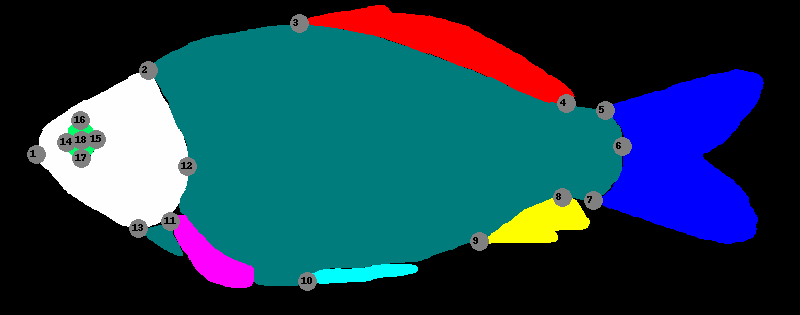

In [29]:
# Visualize landmarks
measure_morpho.visualize_landmark()


## 3- Visualization_morphology

In [30]:
Vis_morpho = tc.Visualization_morphology(segmented_file)

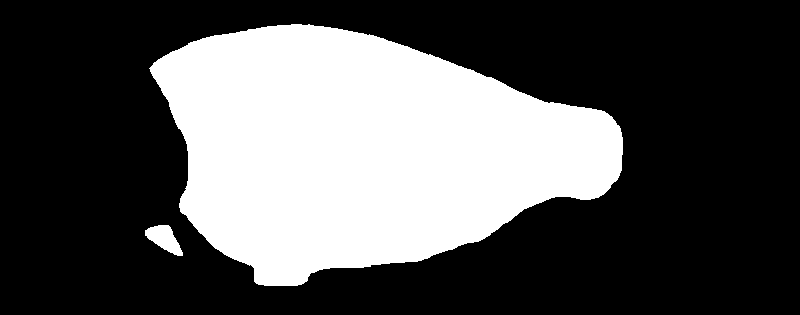

In [31]:
# Visualize the mask corresponding to the trunk
Vis_morpho.visualize_trait("trunk")

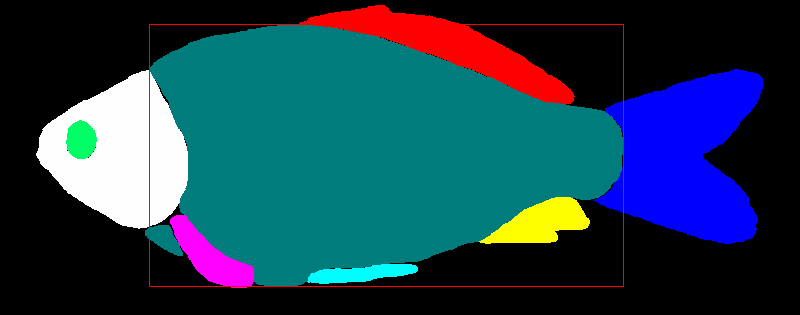

In [32]:
# Visualize the bbox for a trait
Vis_morpho.visualize_a_bbox("trunk")

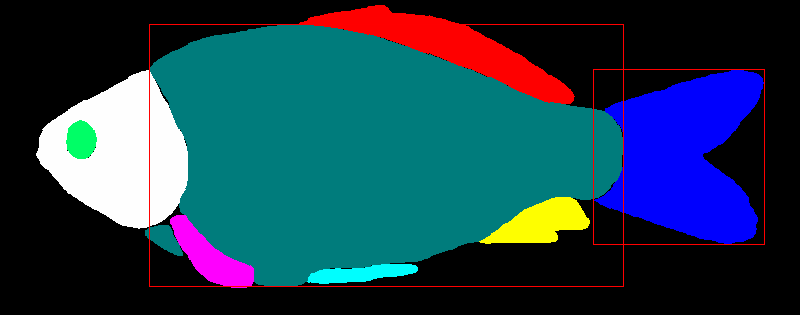

In [33]:
# Visualize the bbox for multiple traits
Vis_morpho.visualize_multi_bbox(["trunk", "c"])

In [19]:
# presence dictionnary
presence_matrix

{'dorsal_fin': {'number': 1, 'percentage': 1.0},
 'adipos_fin': {'number': 0, 'percentage': 0},
 'caudal_fin': {'number': 1, 'percentage': 1.0},
 'anal_fin': {'number': 1, 'percentage': 1.0},
 'pelvic_fin': {'number': 1, 'percentage': 1.0},
 'pectoral_fin': {'number': 1, 'percentage': 1.0},
 'head': {'number': 1, 'percentage': 1.0},
 'eye': {'number': 1, 'percentage': 1.0},
 'caudal_fin_ray': {'number': 0, 'percentage': 0},
 'alt_fin_ray': {'number': 0, 'percentage': 0},
 'trunk': {'number': 2, 'percentage': 0.9921203180657}}

In [22]:
# measurement dictionnary with measurement using bbox
measurement_with_bbox

{'SL_bbox': 587, 'HL_bbox': 152, 'ED_bbox': 31, 'pOD_bbox': 30, 'FA_pca': 0.0}

In [23]:
# measurement dictionnary with measurement using landmarks
measurement_with_lm

{'SL_lm': 586.05,
 'HL_lm': 151.48,
 'ED_lm': 30.15,
 'HH_lm': 100,
 'HH_lm_v2': 99.0,
 'pOD_lm': 32.31,
 'HD_lm': 158.32,
 'FA_lm': -0.78}

In [24]:
# measurement dictionnary for area
measurement_with_area

{'EA_m': 921, 'HA_m': 16034}

In [26]:
# Combine the result in a single dictionnary
measurement = {'base_name': base_name, **measurement_with_bbox, **measurement_with_lm, **measurement_with_area }
list_measure= ['base_name','SL_bbox', 'SL_lm', 'HL_bbox', 'HL_lm', 'pOD_bbox', 'pOD_lm', 'ED_bbox', 'ED_lm', 'HH_lm', 'EA_m','HA_m','FA_pca', 'FA_lm']
measurement = {k:measurement[k] for k in list_measure}
measurement

{'base_name': 'INHS_FISH_000742',
 'SL_bbox': 587,
 'SL_lm': 586.05,
 'HL_bbox': 152,
 'HL_lm': 151.48,
 'pOD_bbox': 30,
 'pOD_lm': 32.31,
 'ED_bbox': 31,
 'ED_lm': 30.15,
 'HH_lm': 100,
 'EA_m': 921,
 'HA_m': 16034,
 'FA_pca': 0.0,
 'FA_lm': -0.78}

In [27]:
# Visualize landmarks 
img_landmark

NameError: name 'img_landmark' is not defined

#### 4- Explore how the class works

    1. Create the object Masks extraction : 
    During the creattion of the object everything will happened automatically. We will detail the different step that has happened under the hood. The image is imported from the input file, the image is then convert in to 11 masks corresponding to each traits then, we clean the masks and extract morphological info such as area, centroid, landmarks... then we calculate the different measurements we want.
    2. Import the image and Masks extraction
    3. Clean the mask
    4.
    5. 

### 1- Masks extraction 

    + Import the image : 
    + Function to convert the image.png in to a disctionnary with key = trait ('trunk', 'dorsal_fin'...)
    masks = img_seg.mask
    + Visualize the mask
    


In [34]:
# Convert the image.png the dictionnary of mask
# 1- use the variable "mask" which is created by the function "img_seg.get_channels_mask()"
masks_dict = img_seg.mask

print("This is the list of the trait :",list(masks_dict.keys()))

This is the list of the trait : ['dorsal_fin', 'adipos_fin', 'caudal_fin', 'anal_fin', 'pelvic_fin', 'pectoral_fin', 'head', 'eye', 'caudal_fin_ray', 'alt_fin_ray', 'trunk']


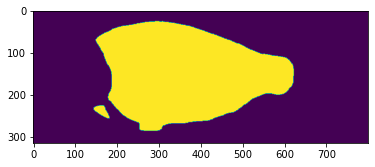

In [35]:
# Visualize the mask for a specific trait
trait_name = 'trunk'
plt.imshow(masks_dict[trait_name])

### 2- Clean the mask and presence matrix

Clean the mask involve:
 + Assessing the number of blob and decide what we keep and what we discard
 + Filling up hole in the blob
 + Create the presence matrix with Number of blob and the percentage of the biggest
 
We will use the module skimage.measure.regionprops to manipulate the mask, find the individual blobs and  access properties of the "region" (blob) such as centroid, area, bbox... (reference : https://scikit-image.org/docs/dev/api/skimage.measure.html)

In [ ]:
# Example of problem, the head trait mask as hole inisde correspond to the eye.
# we want the whole head especially if we want to calculate area


In [36]:
# Create a regionprop that has been cleaned
# Remove hole 
# Keep only the big blob
# regionprop_object has mutiple properties
regionprop_head = img_seg.clean_trait_region(masks_dict['head'])

area : 16034
centroid : (152.78414618934764, 119.61232381189971)


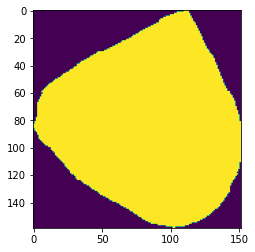

In [37]:
# Explore Regionprop_object properties
# full list of properties is here https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops
print("area :", regionprop_head.area)
print("centroid :", regionprop_head.centroid)
# display the image of the new mask correponding to the clean trait mask
plt.imshow(regionprop_head.image)

## Development Section

This is where we make a mess!!!

### Develop a tool to visualize the box around biggest blob for one specific trait

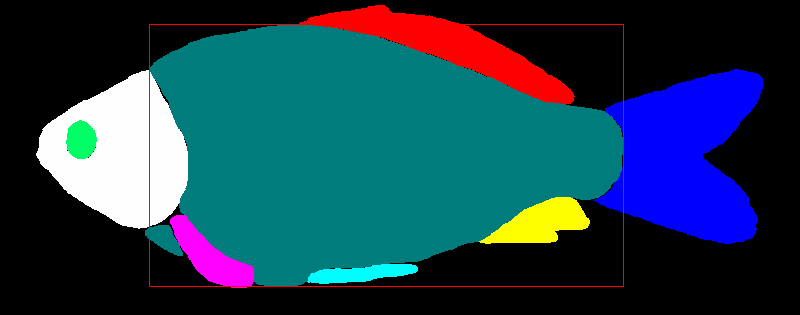

In [52]:
# Develop a tool to visualize the box around biggest blob for one specific trait
# Draw a bbox 
# importing image object from PIL
from PIL import Image, ImageDraw

mask_dict = img_seg.mask
trunk_prop = img_seg.clean_trait_region(mask_dict['trunk'])
trunk_bbox = trunk_prop.bbox

top, left, bottom, right = trunk_bbox
wide = bottom-top
height = right-left
shape = [(left, top), (right,bottom)]
  
# creating new Image object
img_arr = img_seg.img_arr
img = Image.fromarray(img_arr)
img1 = ImageDraw.Draw(img)
  
# create rectangle image
img1 = ImageDraw.Draw(img)  
img1.rectangle(shape, outline ="red")
img

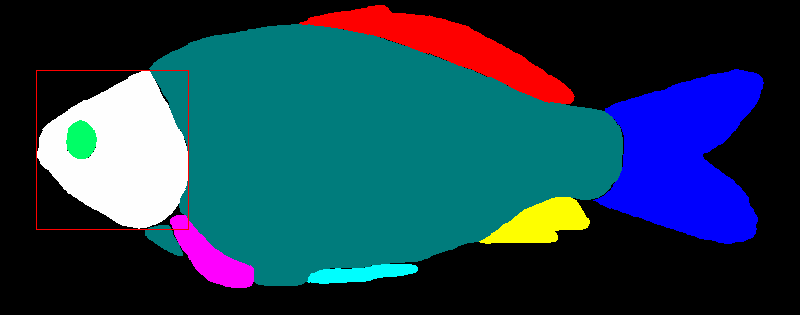

In [50]:
Vis_morpho.visualize_a_bbox('head')

### Test/explore methods to get the trunk upper contour length from landmarks #2 to #5

In [54]:
trunk_mask = trunk_prop.image
pad_mask =np.pad(trunk_mask, ((1, 1), (1,1)), 'constant', constant_values=((0, 0),(0,0)))
list_contour = ski.measure.find_contours(trunk_mask)
erosion_trunk = ski.morphology.erosion(pad_mask)
#plt.imshow(pad_mask)
np.all(pad_mask == erosion_trunk)
sum(sum(pad_mask))

82722

In [55]:
print(pad_mask.shape)
print( trunk_mask.shape)
print(ski.measure.perimeter(trunk_mask))
print(ski.measure.perimeter(pad_mask))

(264, 476)
(262, 474)
1287.8448045156717
1287.8448045156717


In [56]:
contour_1 = ski.measure.find_contours(trunk_mask)
print(len(contour_1))
print(sum([a.shape[0] for a in contour_1]))

contour_2 = ski.measure.find_contours(pad_mask)[0]
print(contour_2.shape)

contour_ = np.logical_and(pad_mask, np.logical_not(erosion_trunk))
print(sum(sum(contour_)))
contour_3 = ski.measure.find_contours(contour_)[0]
print(sum([a.shape[0] for a in contour_]))

5
1442
(1509, 2)
1135
125664


[array([[262.5, 149. ],
        [262.5, 148. ],
        [262.5, 147. ],
        ...,
        [261.5, 150. ],
        [262. , 149.5],
        [262.5, 149. ]])]

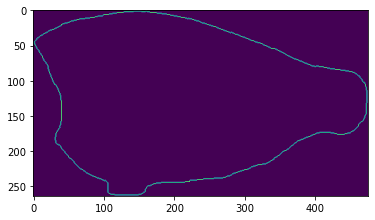

In [58]:
contour_ = np.logical_and(pad_mask, np.logical_not(erosion_trunk))
plt.imshow(contour_)
list_contour = ski.measure.find_contours(contour_)
list_contour_2 = ski.measure.find_contours(pad_mask)
list_contour_2


In [59]:
a =list_contour_2[0]
a.shape

(1509, 2)

In [60]:
distance = lambda a,b: ((a[0] - b[0])**2 + (a[1] - b[1])**2)**0.5
distance(list_contour_2[0][0,:],list_contour_2[0][1,:])
a =list_contour_2[0]
list_segment = [distance(a[i,:],a[i+1,:]) for i in range(a.shape[0]-1)]
sum(list_segment)

1290.673231640406

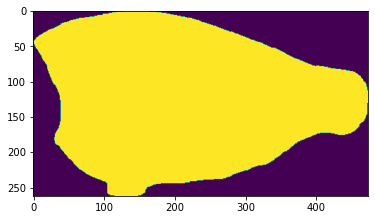

In [62]:
plt.imshow(trunk_prop.image)

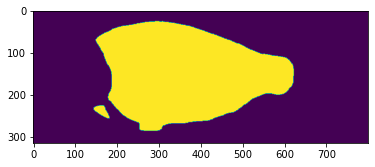

In [63]:
caudal_fin = img_seg.mask['trunk']

plt.imshow(caudal_fin)

### Develop a tool to get landmark #5 and #7 on the caudal fin

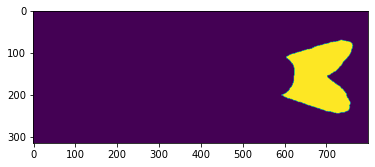

In [64]:
plt.imshow(img_seg.mask['caudal_fin'])

In [66]:
_,_,_,_,center_caudal,new_mask_caudal= measure_morpho.landmark_generic('caudal_fin')

row_caudal = round(center_caudal[0])
head_horil_line = new_mask_caudal[row_caudal, :]
#head_length = np.count_nonzero( cleaned_mask[:,col_eye]== 1)



In [69]:
def landmark_5_7(img_seg):
    '''
    locate the landmark 5 and 7 of the caudal fin. 
    We split the caudal fin upper and lower part (horizontal line through the middle).
    Then, in each case get the mot left point in the half of the caudal fin
    '''
    _,_,_,_,center_caudal,new_mask_caudal= measure_morpho.landmark_generic('caudal_fin')
    mask_caudal_5 = new_mask_caudal.copy()
    mask_caudal_7 = new_mask_caudal.copy()
    row_caudal = round(center_caudal[0])

    mask_caudal_5[row_caudal:,:] = 0
    mask_caudal_7[:row_caudal,:] = 0
        
    lm_5_7=[]
    for temp_mask in [mask_caudal_5,mask_caudal_7]:        
        x,y = np.where(temp_mask)
        y_front = y.min()
        x_front = round(np.mean(np.where(temp_mask[:, y_front,])))
        lm_5_7.append((int(x_front),int(y_front)))
    return lm_5_7[0], lm_5_7[1]

In [70]:
lm_5, lm_7 = landmark_5_7(img_seg)

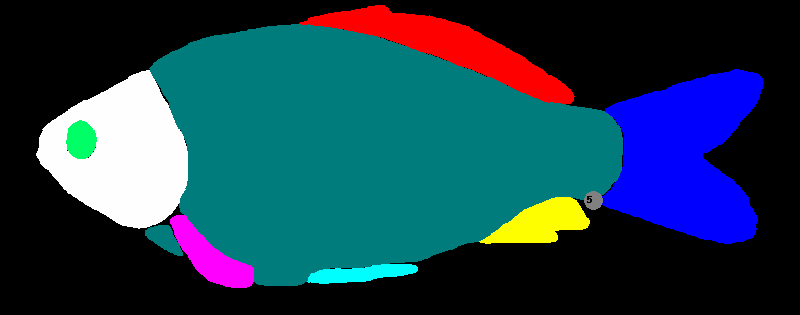

In [74]:
# Function
from PIL import Image
def visualize_landmark(img_arr,coord):
    '''function to visualize one landmark define by coord''' 
    
    text = '5'    
        
    img = Image.fromarray(img_arr)
    img1 = ImageDraw.Draw(img)
        
    #
    #fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 15)
    fnt = ImageFont.load_default()

    x,y = coord
    xy = [(y-9,x-9),(y+9,x+9)]
    img1.ellipse(xy, fill='gray', outline=None, width=1)
                
    img1.text((y-6, x-6), text, font=fnt, fill='black')
    # Display the image created
            
    return img
    
    
img_arr = img_seg.img_arr    
visualize_landmark(img_arr,lm_7)